<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/Projekt_grupowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('spotify_data clean.csv') #wczytywanie danych
dataset.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [ ]:
dataset = dataset.drop(columns=['track_id', 'album_id', 'artist_genres']) #usuwanie kolumn
dataset.head()

,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,OMG!,1,0,True,Yelawolf,64,2363438,OMG!,2025-10-31,1,single,3.07
2,Hard 2 Find,1,4,True,Riff Raff,48,193302,Hard 2 Find,2025-10-31,1,single,2.55
3,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,ride me like a harley,2,0,True,Rumelis,48,8682,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [ ]:
dataset.isnull().sum()

,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,3
artist_popularity,0
artist_followers,0
album_name,0
album_release_date,0
album_total_tracks,0


In [ ]:
dataset.dropna(subset=['artist_name'], inplace=True) #usuwam wiersze w ktorych są nulle w artist name
dataset.isnull().sum()

,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,0
artist_popularity,0
artist_followers,0
album_name,0
album_release_date,0
album_total_tracks,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset['artist_popularity'].values.reshape(-1, 1)
y = dataset['track_popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (6863, 1)
X_test_scaled shape: (1716, 1)
y_train shape: (6863,)
y_test shape: (1716,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
print("Neural network model compiled successfully.")

Neural network model compiled successfully.


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)
print("Model training complete.")

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2948.4824 - mean_absolute_error: 48.9699 - val_loss: 564.5980 - val_mean_absolute_error: 19.5643
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 538.9324 - mean_absolute_error: 18.5084 - val_loss: 459.3965 - val_mean_absolute_error: 16.7013
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 456.0088 - mean_absolute_error: 16.4632 - val_loss: 435.3377 - val_mean_absolute_error: 16.2096
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 445.7926 - mean_absolute_error: 16.2276 - val_loss: 429.2624 - val_mean_absolute_error: 16.0250
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 440.1264 - mean_absolute_error: 16.1123 - val_loss: 427.7921 - val_mean_absolute_error: 16.0100
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 445.1353 - mean_absolute_error: 16.1067 - val_loss: 428.8714 - val_mean_absolute_error: 15.7239
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 45

In [ ]:
def Show_history(history, epochs):
  mae = history.history['mean_absolute_error']
  val_mae = history.history['val_mean_absolute_error']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, mae, label="mean_absolute_error")
  plt.plot(epochs_range, val_mae, label="val_mean_absolute_error")
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="Training loss")
  plt.plot(epochs_range, val_loss, label="Validation loss")
  plt.legend(loc="upper right")
  plt.title("Training and validation losses")
  plt.show()

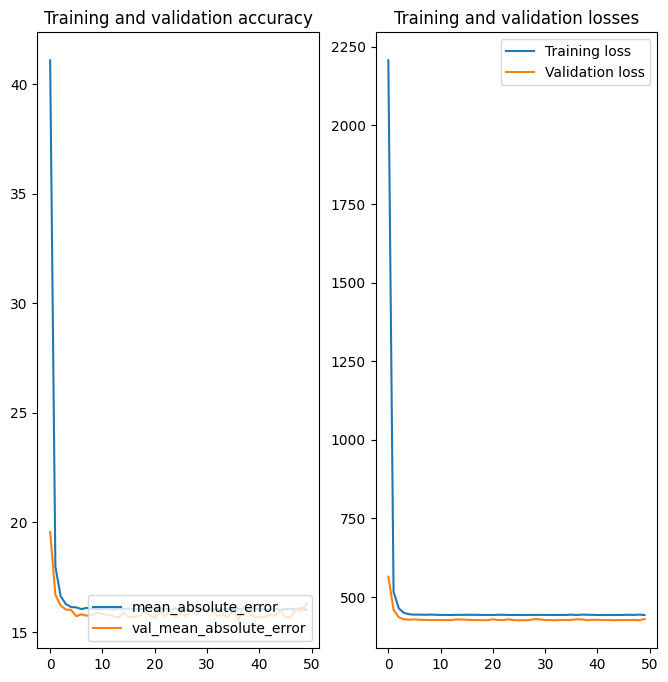

In [ ]:
Show_history(history,50)

In [ ]:
y_test_predictions = model.predict(X_test_scaled)
true_vs_pred = pd.DataFrame({'y_test': y_test, 'y_test_predictions': y_test_predictions.reshape(-1)})
true_vs_pred.head()

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,y_test,y_test_predictions
0,37,53.911942
1,55,57.983276
2,72,52.876839
3,33,22.164579
4,64,57.983276


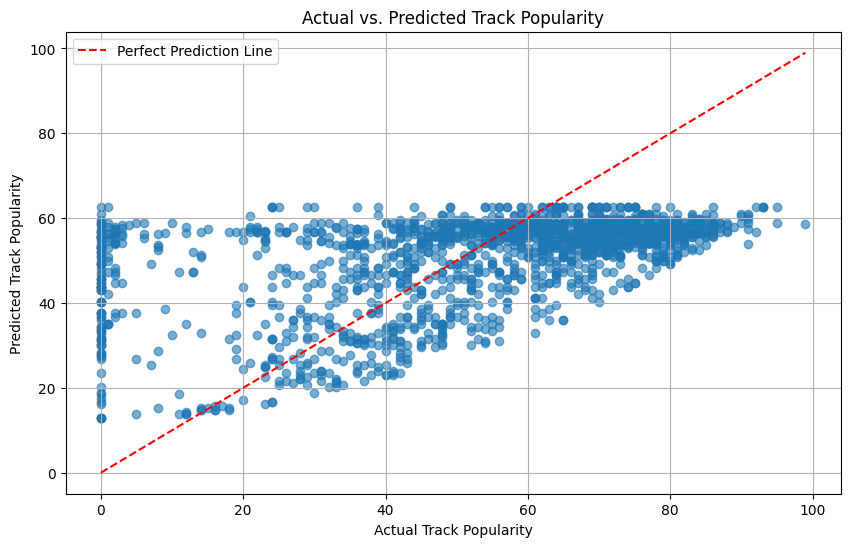

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predictions.flatten(), alpha=0.6)
plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.title('Actual vs. Predicted Track Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.legend()
plt.grid(True)
plt.show()